# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 9303 Павлов Дмитрий и Скворчевсикй Богдан. Вариант №10

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Дискретный сигнал:** $\displaystyle x_0, \dots, x_{N-1}$, как правило, получается при дискретизации аналогового (определённого во все моменты времени) сигнала $\displaystyle s(t)$

Пусть отсчёты $\displaystyle x_k$, дискретного сигнала получены в результате равномерной дискретизации сигнала $\displaystyle s(t)$ с шагом дискретизации, равным единице.

$$x_k = \displaystyle s(t_k)$$, где $\displaystyle t_k - t_{k-1}=T, k = 0,1,\dots N-1, T=1$

Если

$$\displaystyle t_k - t_{k-1}= \Delta T$$, где $\displaystyle \Delta t \not = 1, k = 1, 2,\dots, N-1$,

то вводим $\hat{t_k} = \dfrac{(t_k - t_0)}{\Delta t}, k = 0,1,2,3, ..., N-1$

Получаем $\hat{t_k} = k; s(\hat{t_k}) = s(k \Delta t), k = 0,1, ..., N-1$

**Дискретное преобразование Фурье** Поскольку $s(t)$ периодическая функция, ее можно
разложить в ряд Фурье, коэффициенты которого
вычисляются по формуле: $X(n) = \dfrac{1}{NT} \int\limits_0^{NT} s(t)e^{-i\omega_n t}dx$ или после преобразорваний $X(n) = \sum\limits_{k = 0}^{N-1} x_k e ^ { -i \dfrac{2\pi nk}{N}}, n = 0, 1, 2, ..., N-1$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [117]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

def custom_plot(x, y, label_x, label_y, title, stem=False):
   plt.plot(x, y) if not stem else plt.stem(x, y)
   plt.xlabel(label_x)
   plt.ylabel(label_y)
   plt.title(title)
   plt.show()

def fourier_plot(y, label_x, label_y, title):
   plt.stem(y)
   plt.xlabel(label_x)
   plt.ylabel(label_y)
   plt.title(title)
   plt.show()

## Пункт 1

$\bullet$ Сформируем дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_kt+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от $0$ до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от $1$ до $11$, определяемые случайным образом с помощью датчика равномерно распределённых случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от $0$ до $0.5$. Дискретная последовательность должна включать в себя $32$ отсчёта ($N=31$).

In [118]:
def analog_signal(n):
    ws = np.arange(0, 1.01*np.pi, 0.1*np.pi)
    us = np.random.random(size=11)/2.
    As = np.random.randint(1, 11, 11)
    x, y = np.linspace(0, 31, n),0
    for w, u, A in zip(ws, us, As):
        y += A*np.cos(w*x + u)
    y = y / np.sum(As)
    return x, y

def discrete_signal(y):
    return np.linspace(0, 32, 32), [y[index * 8] for index in range(32)]

## Пункт 2

$\bullet$ Визуализируем исходные аналоговый и дискретизированный сигналы.

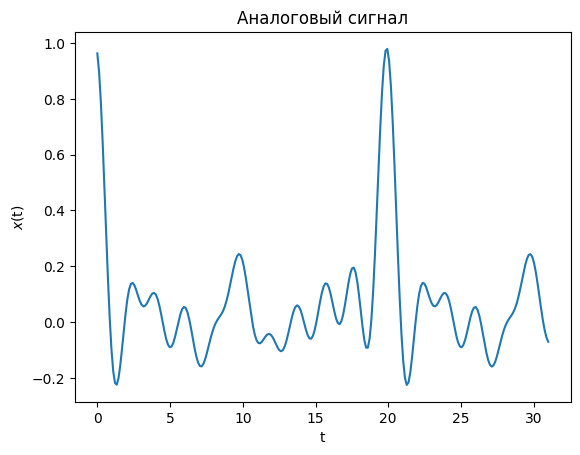

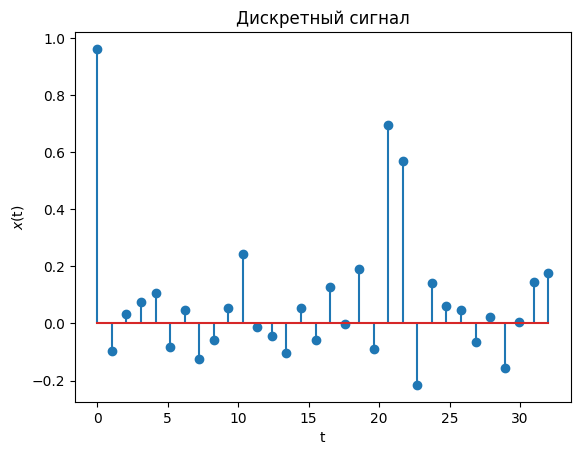

In [119]:
x, y = analog_signal(256)
analog_plot = custom_plot(x=x, y=y, label_x='t', label_y=r'$x$(t)', title='Аналоговый сигнал')

x_disc, y_disc = discrete_signal(y)
discrete_plot = custom_plot(x=x_disc, y=y_disc, label_x='t', label_y=r'$x$(t)', title='Дискретный сигнал', stem=True)

## Пункт 3

$\bullet$ Найдем дискретные отсчеты спектра дискретного сигнала и визуализировать их с помощью Дискретного приобразования Фурье

Представим дискретный сигнал в виде функции от времени:

$$\displaystyle s(t)=\sum_{k=-\infty}^\infty x_k\delta(t-k)$$

Тогда спектр дискретного сигнала:

$$\displaystyle S(\omega)=\sum_{k=-\infty}^\infty x_ke^{-i\omega k}$$

Другое представление дискретного сигнала:

$$\displaystyle s_d(t)=s(t)\sum_{k=-\infty}^\infty \delta(t-kT)$$

Получим дискретные отсчеты спектра и визуализируем их. Так как $s(t)$ - периодическая функция, то мы разложим ее в ряд Фурье с помощью дискретного преобразования Фурье.

Представим полученноу сумму в виде комплексного ряда Фурье:

$$\displaystyle S_d(\omega)=\dfrac{1}{T}\sum_{k=-\infty}^\infty S\bigg(\omega - \dfrac{2\pi k}{T}\bigg)$$

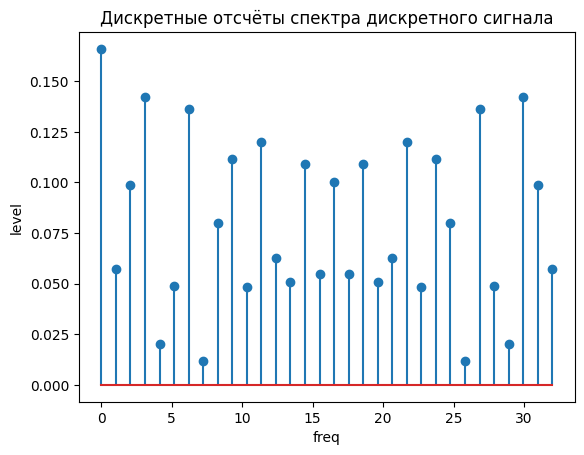

In [120]:
custom_plot(x=x_disc, y=2*np.abs(fft(y_disc))/32, label_y=r'level', label_x='freq', title='Дискретные отсчёты спектра дискретного сигнала', stem=True)

Спектр симметричен относительно нуля, он представляет собой разложение исходного сигнала на линейную комбинацию простых
синусоидальных функций и отражает амплитуды этих функций на разных частотах. Спектр имеет периодичность с шагом 1.

4.  Применим линейное сглаживание по 5-ти и 9-ти точкам для дискретного сигнала и представим формулу для $H(\omega)$ - передаточной функции (частотной характеристики) фильтра.

Передаточные функции фильтра для 5 и 9 точек:

$H_5 (\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega})$

$H_9(\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega} + 2\cos{3\omega} + 2\cos{4\omega})$

Выведем формулу для линейного сглаживания по 5 точкам и 9 точкам:

$y_{n,5} = \frac15 \sum\limits_{k=n-2}^{n+2} x_k$

$y_{n,9} = \frac19 \sum\limits_{k=n-4}^{n+4} x_k$

In [121]:
p4_y_5 = np.convolve(y_disc, np.ones(5), 'same') / 5
p4_y_9 = np.convolve(y_disc, np.ones(9), 'same') / 9

5. Визуализируем полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом:

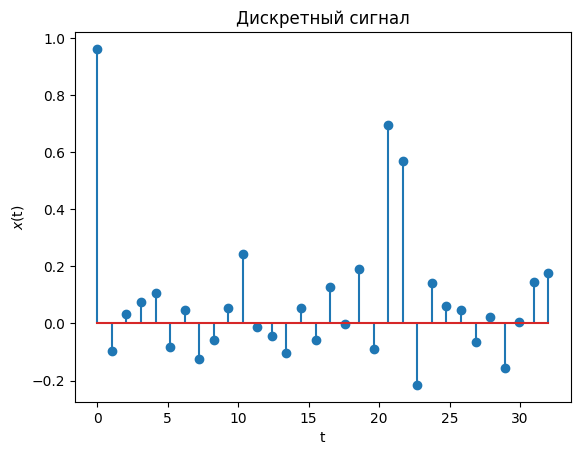

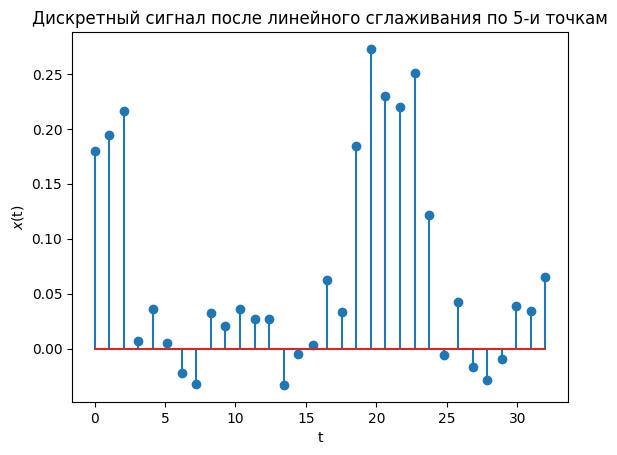

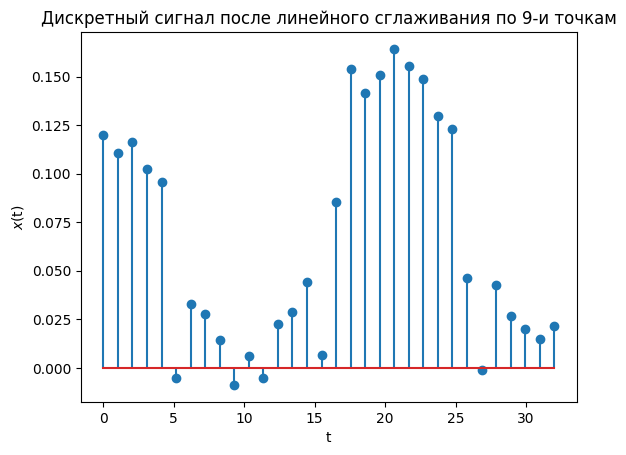

In [122]:
custom_plot(x=x_disc, y=y_disc, label_x='t', label_y=r'$x$(t)', title='Дискретный сигнал', stem=True)
custom_plot(x=x_disc, y=p4_y_5, label_x='t', label_y=r'$x$(t)', title='Дискретный сигнал после линейного сглаживания по 5-и точкам', stem=True)
custom_plot(x=x_disc, y=p4_y_9, label_x='t', label_y=r'$x$(t)', title='Дискретный сигнал после линейного сглаживания по 9-и точкам', stem=True)

6. С помощью ДПФ найдём дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализируем их совместно с отсчетами спектра исходного дискретного сигнала.

Дискретное преобразование Фурье (ДПФ):

$X(n) = \sum\limits_{k=0}^{N-1}y_k e^{-i {{2\pi n} \over N} k}$, $n = 0,1,2,\dots,N-1$

Построим графики:

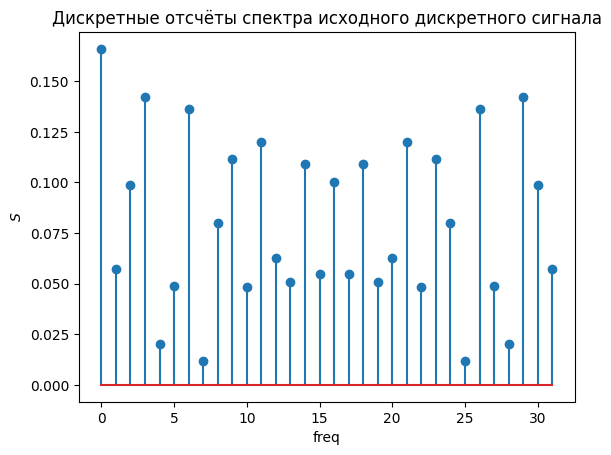

In [123]:
fourier = fft(y_disc)
fourier = 2*np.abs(fourier) / len(fourier)
fourier_plot(y=fourier, label_x='freq', label_y=r'$S$', title='Дискретные отсчёты спектра исходного дискретного сигнала')

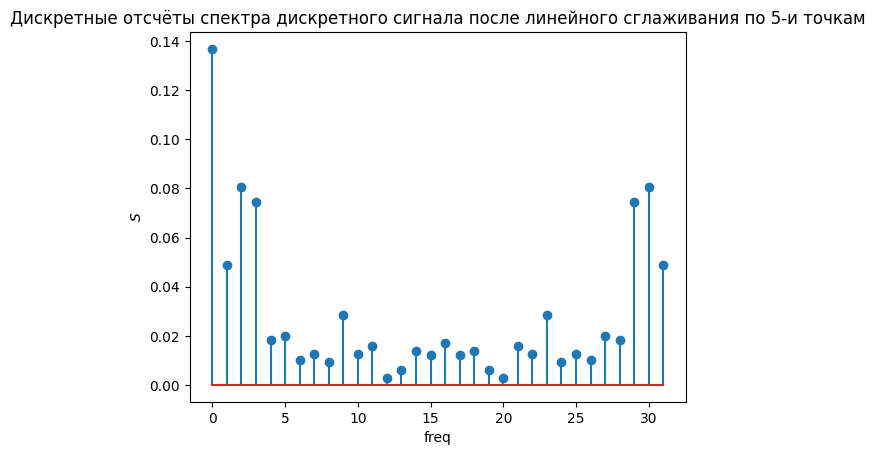

In [124]:
fourier_5 = fft(p4_y_5)
fourier_5 = 2 * np.abs(fourier_5) / len(fourier_5)
fourier_plot(
            y=fourier_5,
            label_x='freq',
            label_y=r'$S$',
            title='Дискретные отсчёты спектра дискретного сигнала после линейного сглаживания по 5-и точкам',
            )

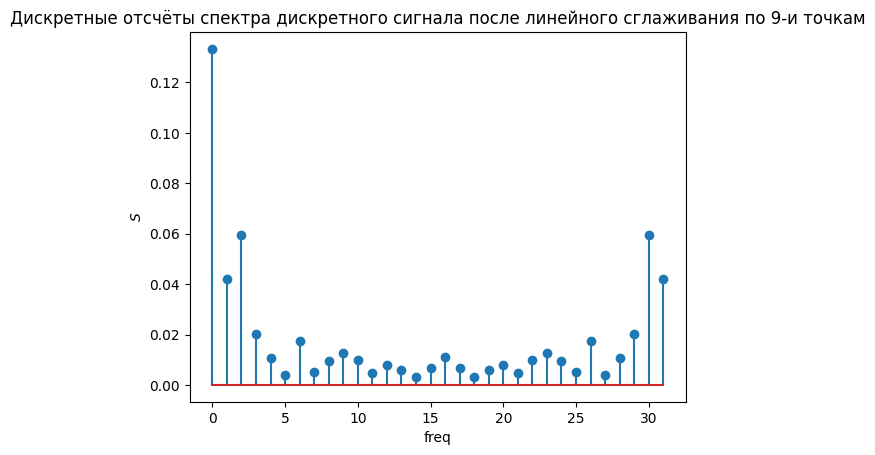

In [125]:
fourier_9 = fft(p4_y_9)
fourier_9 = 2 * np.abs(fourier_9) / len(fourier_9)
fourier_plot(
            y=fourier_9,
            label_x='freq',
            label_y=r'$S$',
            title='Дискретные отсчёты спектра дискретного сигнала после линейного сглаживания по 9-и точкам',
            )

Можно заметить, что без ослабления пропускается только сигнал нулевой частоты (постоянного уровня). При увеличении числа точек, полоса пропускания становистя более узкой.

7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

Преобразование Фурье сопоставляет $y_n$, непрерывной во времени и бесконечной функции спектр $X(n)$, непрерывную по частоте, бесконечную функцию. Графики подтверждают ранее сделанные выводы относительно полосы пропускания и ослабления уровня.

8. Повторим пп. 4-7 для следующих фильтров:

a. Сглаживание полиномом 2-й степени по 5 и 9 узлам.

Для дискретного сигнала применим сглаживание полиномом второй степени по 5 и 9 узлам:

$y_5(n) = \frac1{35}(-3x_{k-2} + 12x_{k-1} + 17x_k +12x_{k+1} - 3x_{k+2})$

$y_9(n) = \frac1{231}(-21x_{k-4} + 14x_{k-3} + 39x_{k-2} + 54x_{k-1} + 59x_k + 54x_{k+1} + 39x_{k+2} + 14x_{k+3} - 21x_{k+4})$

Формула для передаточной функции (частотной характеристики) фильтра:

$H_5(\omega) = \frac1{35}(17 + 24\cos\omega - 6\cos{2\omega})$

$H_9(\omega) = \frac1{231}(59 + 108\cos\omega + 78\cos{2\omega} + 28\cos{3\omega} - 42\cos{4\omega})$

Визуализируем полученный после фильтрации дискретный сигнал:

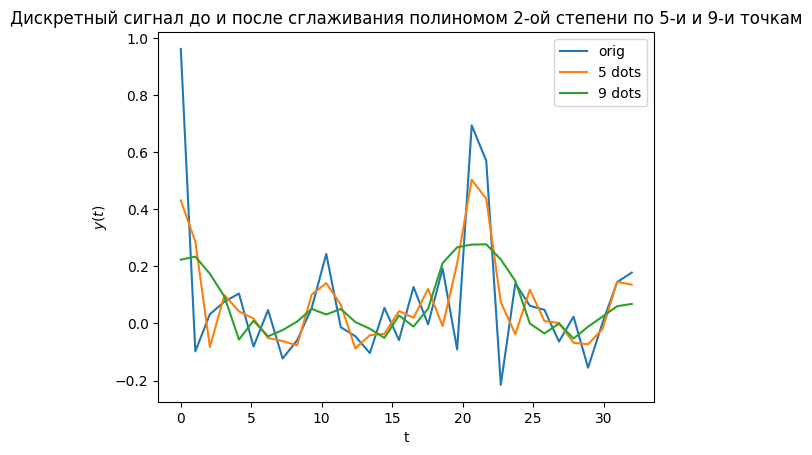

In [126]:
p8_y_5 = np.convolve(y_disc, np.array([-3, 12, 17, 12, -3]), 'same') / 35
p8_y_9 = np.convolve(y_disc, np.array([-21, 14, 39, 54, 59, 54, 39, 14,-21]), 'same') / 231
plt.plot(x_disc, y_disc, label='orig')
plt.plot(x_disc, p8_y_5, label='5 dots')
plt.plot(x_disc, p8_y_9, label='9 dots')
plt.xlabel('t')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.title("Дискретный сигнал до и после сглаживания полиномом 2-ой степени по 5-и и 9-и точкам")
plt.show()

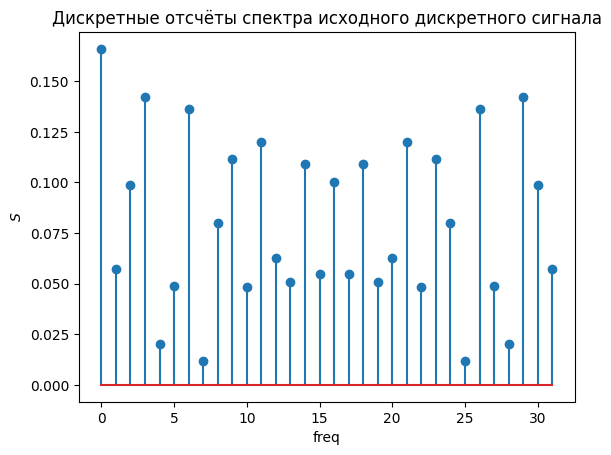

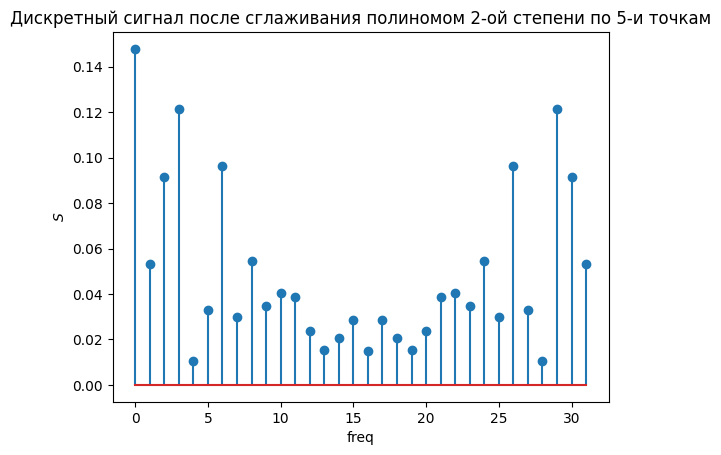

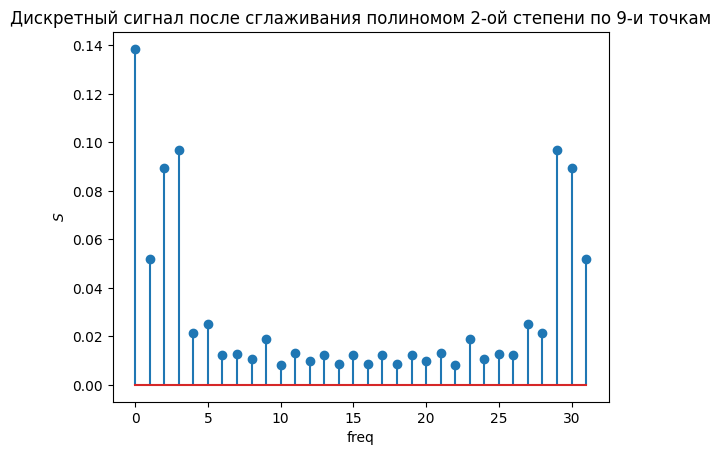

In [127]:
fourier_plot(y=fourier, label_x='freq', label_y=r'$S$', title='Дискретные отсчёты спектра исходного дискретного сигнала')

fourier_5 = fft(p8_y_5)
fourier_5 = 2 * np.abs(fourier_5) / len(fourier_5)
fourier_plot(y=fourier_5, label_x='freq', label_y=r'$S$', title='Дискретный сигнал после сглаживания полиномом 2-ой степени по 5-и точкам')

fourier_9 = fft(p8_y_9)
fourier_9 = 2 * np.abs(fourier_9) / len(fourier_9)
fourier_plot(y=fourier_9, label_x='freq', label_y=r'$S$', title='Дискретный сигнал после сглаживания полиномом 2-ой степени по 9-и точкам')

Из графиков видно, что при увеличении числа точек увеличивается крутизна среза и уменьшается полоса пропускания. Также присутствует более «пологая» часть в полосе пропускания около 0, в отличие от линейного фильтра, поэтому пропускаются сигналы низкой частоты почти без потери амплитуды в более широком диапазоне.

b. Сглаживание полиномом 4-й степени по 7 и 11 узлам.

Для дискретного сигнала применим сглаживание полиномом четвёртой степени по 7 и 11 узлам:

$y_7(n) = \frac1{231}(5x_{k-3} - 30x_{k-2} + 75x_{k-1} + 131x_k + 75x_{k+1} - 30x_{k+2} + 5x_{k+3})$

$y_{11}(n) = \frac1{429} (13x_{k-5} - 45x_{k-4} - 10x_{k-3} + 60x_{k-2} + 120x_{k-1} + 143x_k + 120x_{k+1} + 60x_{k+2} - 10x_{k+3} - 45x_{k+4} - 13x_{k+5})$

Представим формулу для передаточной функции (частотной характеристики) фильтра:

$H_7(\omega) = \frac1{231}(131 + 150\cos\omega - 60\cos{2\omega} + 10\cos{3\omega})$

$H_{11}(\omega) = \frac1{429}(143 + 240\cos\omega + 120\cos{2\omega} - 20\cos{2\omega} - 90\cos{4\omega} + 26\cos{5\omega})$

Построим графики:

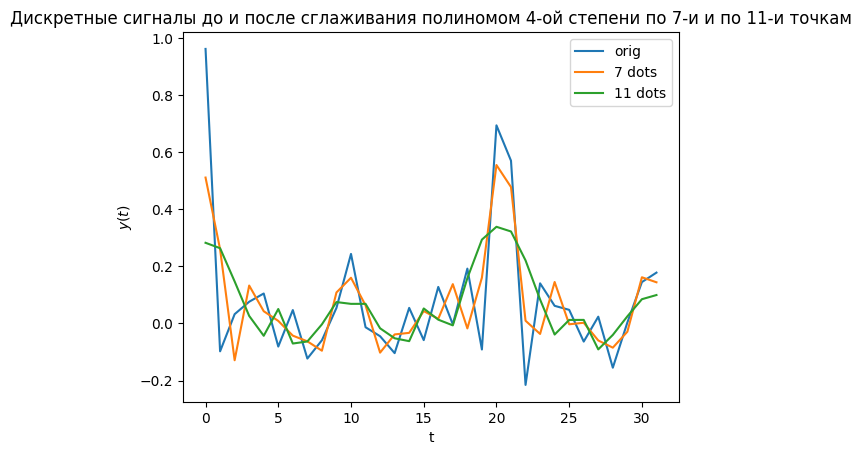

In [128]:
p8_y_7 = np.convolve(y_disc, np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
p8_y_11 = np.convolve(y_disc, np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13]), 'same') / 429

plt.plot(y_disc, label='orig')
plt.plot(p8_y_7, label='7 dots')
plt.plot(p8_y_11, label='11 dots')
plt.xlabel('t')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.title("Дискретные сигналы до и после сглаживания полиномом 4-ой степени по 7-и и по 11-и точкам")
plt.show()

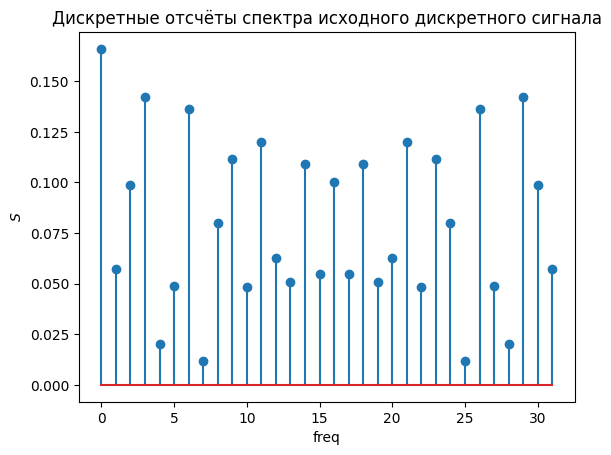

In [129]:
fourier_plot(y=fourier, label_x='freq', label_y=r'$S$', title='Дискретные отсчёты спектра исходного дискретного сигнала')

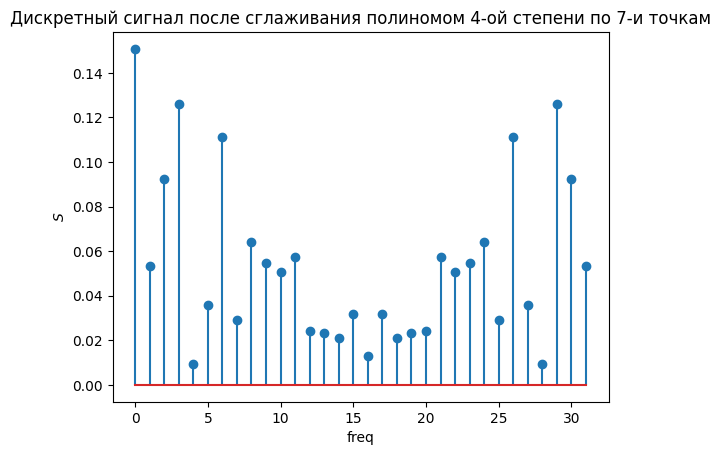

In [130]:
fourier_7 = fft(p8_y_7)
fourier_7 = 2 * np.abs(fourier_7) / len(fourier_7)
fourier_plot(y=fourier_7, label_x='freq', label_y=r'$S$', title='Дискретный сигнал после сглаживания полиномом 4-ой степени по 7-и точкам')

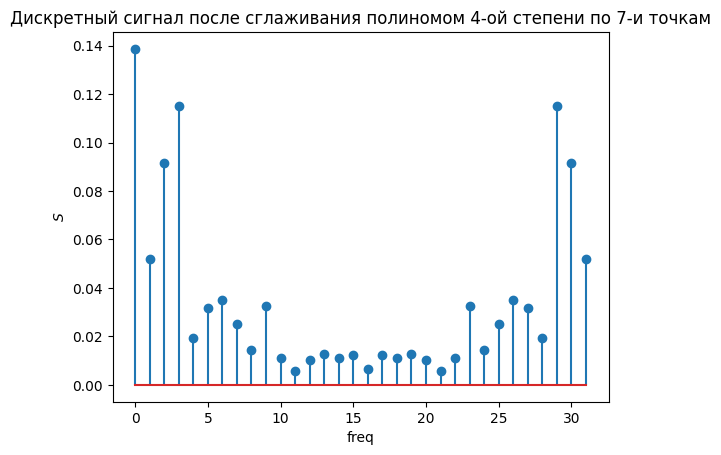

In [131]:
fourier_11 = fft(p8_y_11)
fourier_11 = 2 * np.abs(fourier_11) / len(fourier_11)
fourier_plot(y=fourier_11, label_x='freq', label_y=r'$S$', title='Дискретный сигнал после сглаживания полиномом 4-ой степени по 7-и точкам')

По графикам можно сделать вывод, что полученные спектры после фильтрации схожи с таковыми при сглаживании полиномом 2-й степени, но в данном случае наблюдается более широкая пологая часть пропускания низких частот практически без ослабления. При сглаживании по 11-и точкам можно заметить, что полоса пропускания становится более узкая, это видно на спектре: большее число дискретных отсчётов ослабляется.

## Выводы

В ходе лабораторной работы были получены практические навыки выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).